[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov5.ipynb)

## 0. Preperation

- Install latest version of SAHI and ultralytics:

In [1]:
# !pip install -U torch sahi ultralytics

In [2]:
import os
os.getcwd()

'C:\\Users\\plumb\\anaconda_projects\\magic'

- Import required modules:

In [3]:
# arrange an instance segmentation model for test
from sahi.utils.yolov8 import (
    download_yolov8s_model,
)

from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download a yolov8 model and two test images:

In [4]:
# download YOLOV5S6 model to 'models/yolov5s6.pt'
yolov8_model_path = "models/yolov8s.pt"
download_yolov8s_model(yolov8_model_path)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv8 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [5]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [6]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [7]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

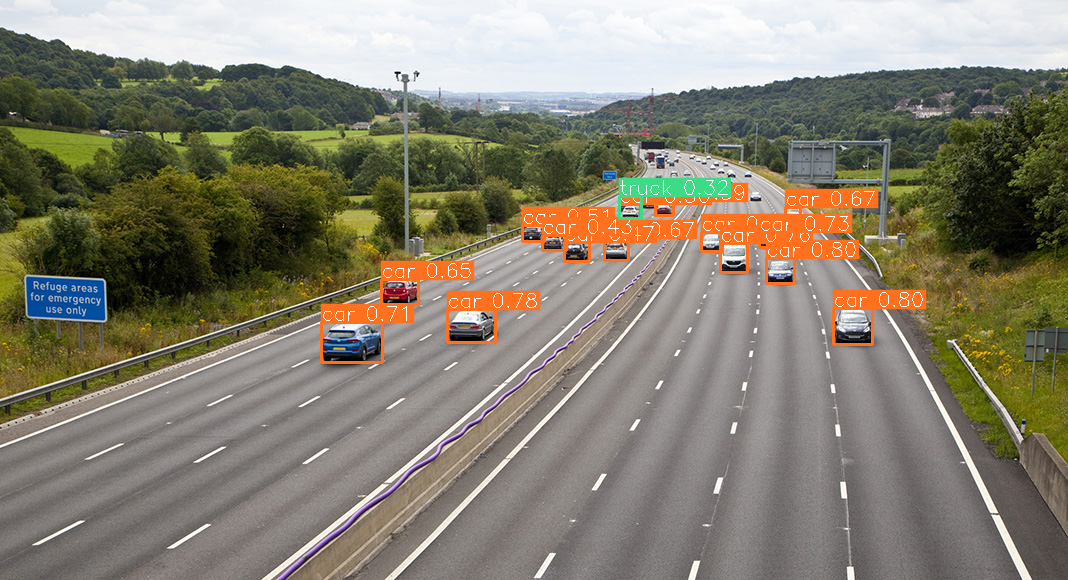

In [8]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv8 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [6]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 number of slices.


In [21]:
for res in result.to_coco_annotations():
    if res['score']>0.1:
        print(res['bbox'],res['score'])

[447.674072265625, 309.57244873046875, 48.0479736328125, 32.4967041015625] 0.8857606053352356
[321.2298278808594, 322.0831069946289, 61.74859619140625, 41.10980987548828] 0.8725772500038147
[832.658935546875, 308.4786148071289, 41.4306640625, 36.400413513183594] 0.8661478161811829
[700.0750503540039, 232.95436096191406, 22.467063903808594, 18.98482894897461] 0.8421548008918762
[765.8670654296875, 258.9719543457031, 28.5579833984375, 24.89673614501953] 0.8295084834098816
[784.5003356933594, 205.58828735351562, 16.109832763671875, 14.612777709960938] 0.7763769030570984
[655.8435668945312, 201.48101806640625, 17.28924560546875, 13.748519897460938] 0.7614331245422363
[749.8591461181641, 191.27279663085938, 12.0028076171875, 9.586669921875] 0.7608190774917603
[718.3531494140625, 242.7335968017578, 30.797515869140625, 30.445457458496094] 0.7566985487937927
[759.5567169189453, 231.27805709838867, 21.523422241210938, 17.201305389404297] 0.7317218780517578
[381.90216064453125, 278.8190155029297

- Visualize predicted bounding boxes and masks over the original image:

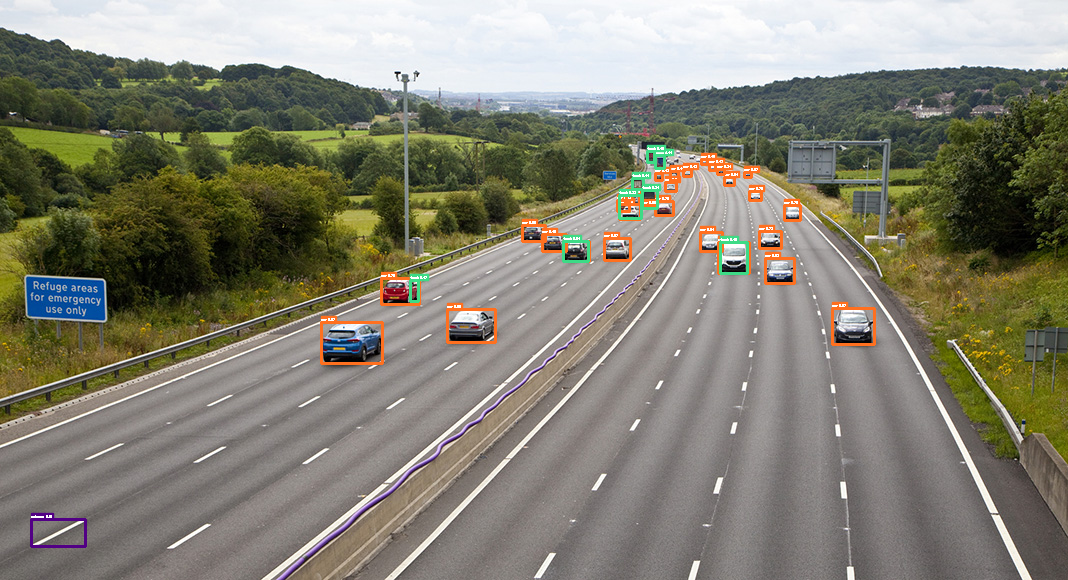

In [20]:
result.export_visuals(export_dir="demo_data/",text_size=0.1)

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [12]:
object_prediction_list = result.object_prediction_list

In [27]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(447.674072265625, 309.57244873046875, 495.7220458984375, 342.06915283203125), w: 48.0479736328125, h: 32.4967041015625>,
    mask: None,
    score: PredictionScore: <value: 0.8857606053352356>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [14]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [447.674072265625,
   309.57244873046875,
   48.0479736328125,
   32.4967041015625],
  'score': 0.8857606053352356,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1561},
 {'image_id': None,
  'bbox': [321.2298278808594,
   322.0831069946289,
   61.74859619140625,
   41.10980987548828],
  'score': 0.8725772500038147,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2538},
 {'image_id': None,
  'bbox': [832.658935546875,
   308.4786148071289,
   41.4306640625,
   36.400413513183594],
  'score': 0.8661478161811829,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1508}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [15]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [447.674072265625,
   309.57244873046875,
   48.0479736328125,
   32.4967041015625],
  'score': 0.8857606053352356,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1561},
 {'image_id': 1,
  'bbox': [321.2298278808594,
   322.0831069946289,
   61.74859619140625,
   41.10980987548828],
  'score': 0.8725772500038147,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2538},
 {'image_id': 1,
  'bbox': [832.658935546875,
   308.4786148071289,
   41.4306640625,
   36.400413513183594],
  'score': 0.8661478161811829,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1508}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [16]:
result.to_imantics_annotations()[:3]

ImportError: Please run "pip install -U imantics" to install imantics first for imantics conversion.

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [ ]:
result.to_fiftyone_detections()[:3]

## 4. Batch Prediction

- Set model and directory parameters:

In [ ]:
model_type = "yolov8"
model_path = yolov8_model_path
model_device = "cuda:0" # or 'cuda:0'
model_confidence_threshold = 0.4

slice_height = 400
slice_width = 400
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [ ]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)